# Unlocking Insights: Predicting House Prices with Data Analysis

In [18]:
# Name: Jason Pangestu
# NIM (Binusian ID) : 2602107650

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data (1).csv")

In [19]:
# Finding the summary about the number of rows and the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Data Preprocessing

In [20]:
# Finding the number of null values in each column which has null values
df.isna().sum()[df.isna().sum() > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [21]:
# Removing columns that contain null values more than 60-70% of the number of rows in the dataset
# Imputing missing values on these columns might introduce bias that might not correlate with the reality of the data.

df.drop(columns=["Alley", "PoolQC", "Fence", "MiscFeature"], inplace=True)

# Finding the number of null values and the datatype of the dataset columns with the missing values
null_info = df.isna().sum()[df.isna().sum() > 0]
null_info = pd.DataFrame({'Missing Values': null_info, 'Datatype': df.dtypes[null_info.index]})
print(null_info)

              Missing Values Datatype
LotFrontage              259  float64
MasVnrType                 8   object
MasVnrArea                 8  float64
BsmtQual                  37   object
BsmtCond                  37   object
BsmtExposure              38   object
BsmtFinType1              37   object
BsmtFinType2              38   object
Electrical                 1   object
FireplaceQu              690   object
GarageType                81   object
GarageYrBlt               81  float64
GarageFinish              81   object
GarageQual                81   object
GarageCond                81   object


For columns other than LotFrontage and FireplaceQu, we will use central tendency to fill null values.
The central tendency will be mean for normal distributed columns, median for skewed columns, and mode for categorical data.

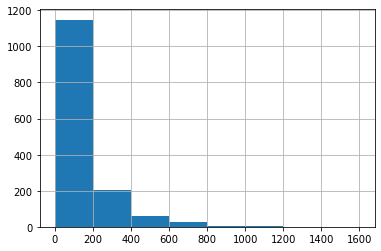

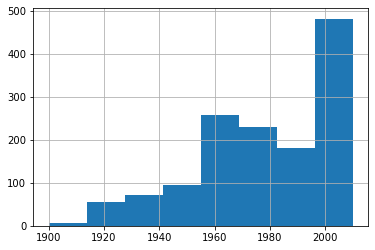

In [22]:
# Viewing the distribution of column MasVnrArea and GarageYrBlt
df['MasVnrArea'].hist(bins=8)
plt.show()
df['GarageYrBlt'].hist(bins=8)
plt.show()

Two of them are skewed. So we will use median as the central tendency to fill the null values.

In [23]:
df['MasVnrArea'].fillna(df['MasVnrArea'].median(), inplace=True)
df['GarageYrBlt'].fillna(df['GarageYrBlt'].median(), inplace=True)

# Filling all the null values in columns other than LotFrontage and FireplaceQu with their mode
mode_columns = ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
                'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for column in mode_columns:
    mode_value = df[column].mode()[0]  # Get the first mode (most frequent value)
    df[column].fillna(mode_value, inplace=True)

# Finding the number of null values and the datatype of the dataset columns with the missing values
null_info = df.isna().sum()[df.isna().sum() > 0]
null_info = pd.DataFrame({'Missing Values': null_info, 'Datatype': df.dtypes[null_info.index]})
print(null_info)

             Missing Values Datatype
LotFrontage             259  float64
FireplaceQu             690   object


Text(0, 0.5, 'Total Sales in USD')

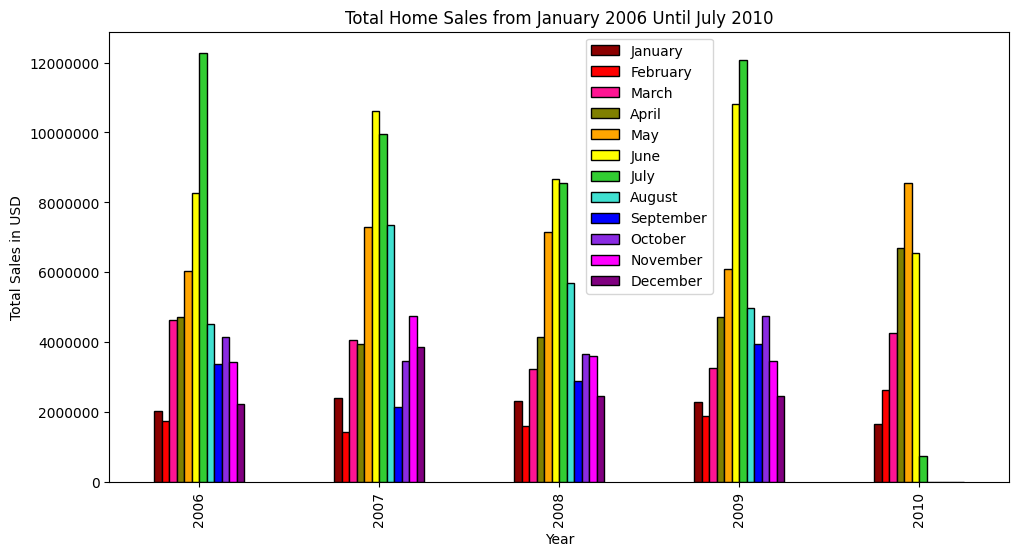

In [33]:
figure = plt.figure(figsize=(10, 5), dpi=100)
axes_1 = figure.add_axes([0.1, 0.1, 0.9, 0.9])
plt.ticklabel_format(style='plain', axis='y')

df.groupby(["YrSold", "MoSold"])["SalePrice"].sum().unstack().plot(kind='bar', ax=axes_1, edgecolor='k', color=['darkred', 'red', 'deeppink', 'olive', 'orange', 'yellow', 'limegreen', 'turquoise', 'blue', 'blueviolet', 'magenta', 'purple'])
plt.legend(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], loc='best', bbox_to_anchor=(0.178, 0.5, 0.5, 0.5))
plt.title('Total Home Sales from January 2006 Until July 2010')
plt.xlabel('Year')
plt.ylabel('Total Sales in USD')

In [4]:
new_data = df.groupby("MSSubClass")["SalePrice"].sum().sort_values()[::-1]
(((new_data.loc[60] + new_data.loc[20])/new_data.sum())*100).round(2)

64.75

Text(0, 0.5, 'Neighborhood')

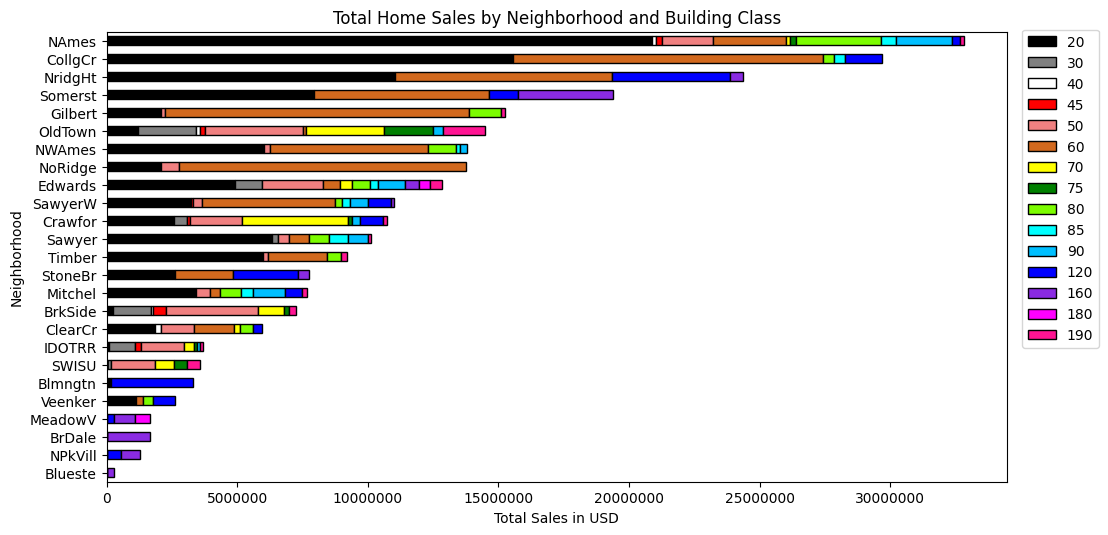

In [20]:
figure = plt.figure(figsize=(10, 5), dpi=100)
axes_1 = figure.add_axes([0.1, 0.1, 0.9, 0.9])

table = df.groupby(["Neighborhood", "MSSubClass"])["SalePrice"].sum().unstack().fillna(0)

table['total'] = table.sum(axis=1)

table = table.sort_values(by='total')

table = table.drop(['total'], axis=1)

table.plot(kind='barh', edgecolor='k', stacked=True, color=['black', 'grey', 'white', 'red', 'lightcoral', 'chocolate', 'yellow', 'green', 'lawngreen', 'aqua', 'deepskyblue', 'blue', 'blueviolet', 'magenta', 'deeppink'], ax=axes_1)
plt.legend(loc='best', bbox_to_anchor=(0.61, 0.52, 0.5, 0.5))
plt.ticklabel_format(style='plain', axis='x')
plt.title('Total Home Sales by Neighborhood and Building Class')
plt.xlabel('Total Sales in USD')
plt.ylabel('Neighborhood')


In [6]:
(df[df['MSSubClass'] == 60]['SalePrice'].sum() + df[df['MSSubClass'] == 20]['SalePrice'].sum())/df['SalePrice'].sum()

0.6474668684366953

Text(0, 0.5, 'Roof Type')

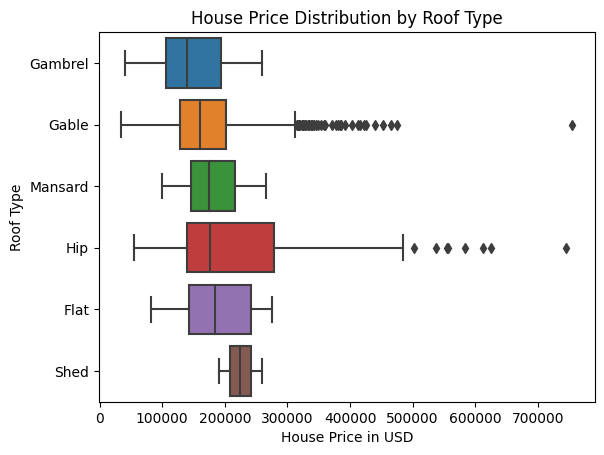

In [21]:
table = df.groupby("RoofStyle")["SalePrice"].median().sort_values()
sns.boxplot(data=df, x='SalePrice', y='RoofStyle', order=table.index)
plt.title('House Price Distribution by Roof Type')
plt.xlabel('House Price in USD')
plt.ylabel('Roof Type')

Text(0, 0.5, 'Paved Driveway')

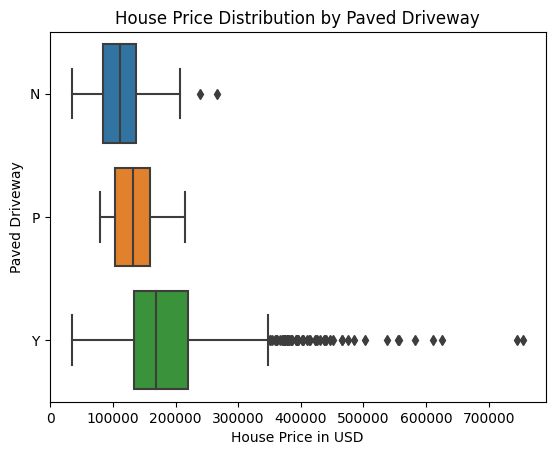

In [22]:
table = df.groupby("PavedDrive")["SalePrice"].quantile(0.25).sort_values()
sns.boxplot(data=df, x='SalePrice', y='PavedDrive', order=table.index)
plt.title('House Price Distribution by Paved Driveway')
plt.xlabel('House Price in USD')
plt.ylabel('Paved Driveway')

Text(0, 0.5, 'Garage Type')

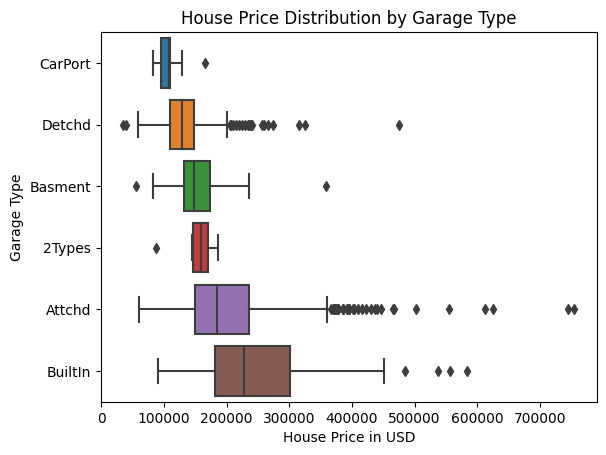

In [23]:
table = df.groupby("GarageType")["SalePrice"].quantile(0.25).sort_values()
sns.boxplot(data=df, x='SalePrice', y='GarageType', order=table.index)
plt.title('House Price Distribution by Garage Type')
plt.xlabel('House Price in USD')
plt.ylabel('Garage Type')

Text(0, 0.5, 'Heater')

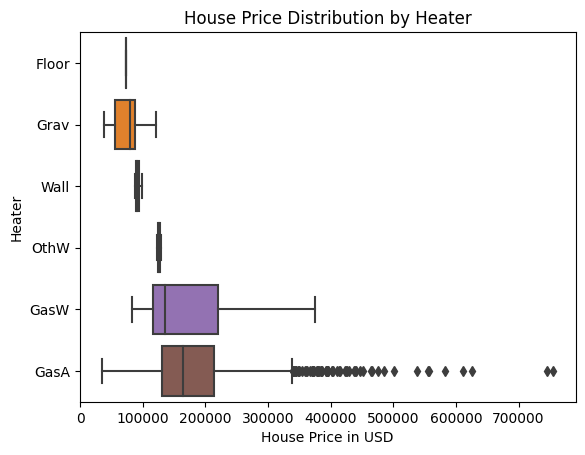

In [24]:
thetype = "Heating"
table = df.groupby(thetype)["SalePrice"].median().sort_values()
sns.boxplot(data=df, x='SalePrice', y=thetype, order=table.index)
plt.title('House Price Distribution by Heater')
plt.xlabel('House Price in USD')
plt.ylabel('Heater')

Text(0, 0.5, 'Electricity')

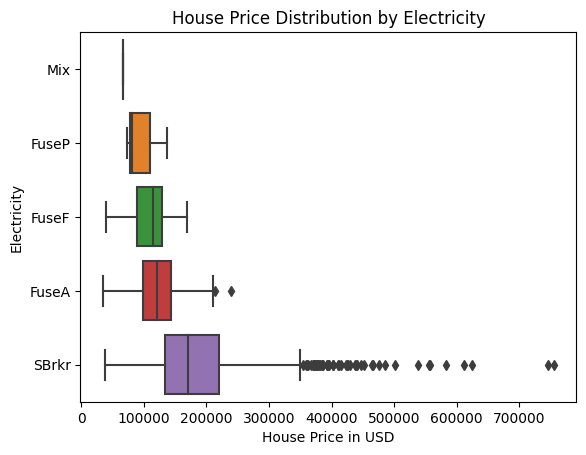

In [25]:
table = df.groupby("Electrical")["SalePrice"].quantile(0.25).sort_values()
sns.boxplot(data=df, x='SalePrice', y='Electrical', order=table.index)
plt.title('House Price Distribution by Electricity')
plt.xlabel('House Price in USD')
plt.ylabel('Electricity')

Text(0, 0.5, 'Miscellaneous Feature')

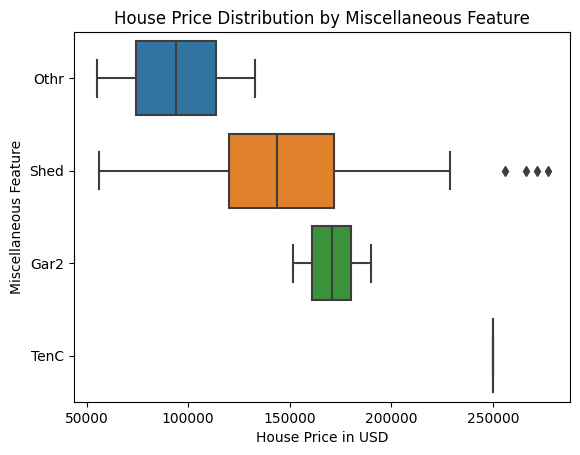

In [26]:
table = df.groupby("MiscFeature")["SalePrice"].quantile(0.25).sort_values()
sns.boxplot(data=df, x='SalePrice', y='MiscFeature', order=table.index)
plt.title('House Price Distribution by Miscellaneous Feature')
plt.xlabel('House Price in USD')
plt.ylabel('Miscellaneous Feature')

In [13]:
print(df[df['RoofStyle'] == 'Gambrel']['SalePrice'].median())
print(df[df['RoofStyle'] == 'Shed']['SalePrice'].median())
print(df[df['PavedDrive'] == 'Y']['SalePrice'].median())
print(df[df['GarageType'] == 'CarPort']['SalePrice'].median())
print(df[df['GarageType'] == 'BuiltIn']['SalePrice'].median())
print(df[df['Heating'] == 'GasA']['SalePrice'].median())
print(df[df['Electrical'] == 'SBrkr']['SalePrice'].median())
print(df[df['MiscFeature'] == 'TenC'])

139000.0
225000.0
168500.0
108000.0
227500.0
164500.0
170000.0
        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1386  1387          60       RL         80.0    16692   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1386         Lvl    AllPub  ...      519     Fa  MnPrv        TenC    2000   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1386      7   2006        WD         Normal     250000  

[1 rows x 81 columns]


Text(0, 0.5, 'Number of Fireplaces')

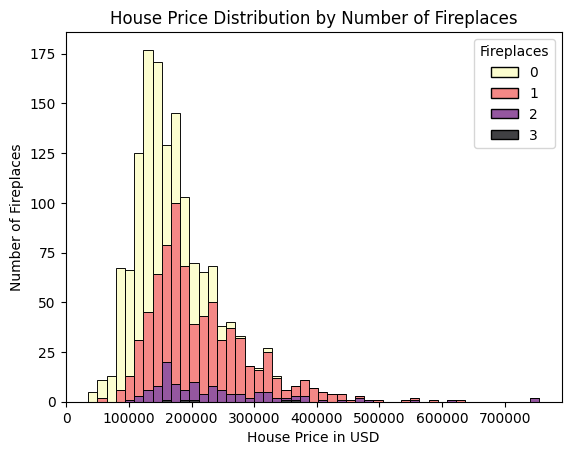

In [27]:
sns.histplot(data=df, x='SalePrice', hue='Fireplaces', multiple='stack', palette=sns.color_palette("magma_r", as_cmap=True))
plt.title('House Price Distribution by Number of Fireplaces')
plt.xlabel('House Price in USD')
plt.ylabel('Number of Fireplaces')

Text(0, 0.5, 'Garage Cars')

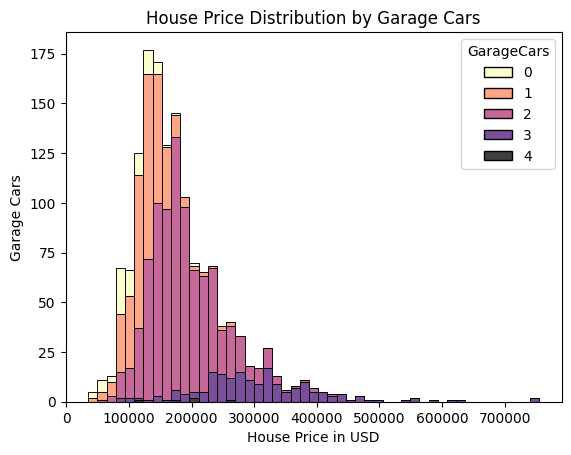

In [28]:
sns.histplot(data=df, x='SalePrice', hue='GarageCars', multiple='stack', palette=sns.color_palette("magma_r", as_cmap=True))
plt.title('House Price Distribution by Garage Cars')
plt.xlabel('House Price in USD')
plt.ylabel('Garage Cars')

Text(0.5, 1.0, 'Correlation of House Price with Other Variables in The Dataset')

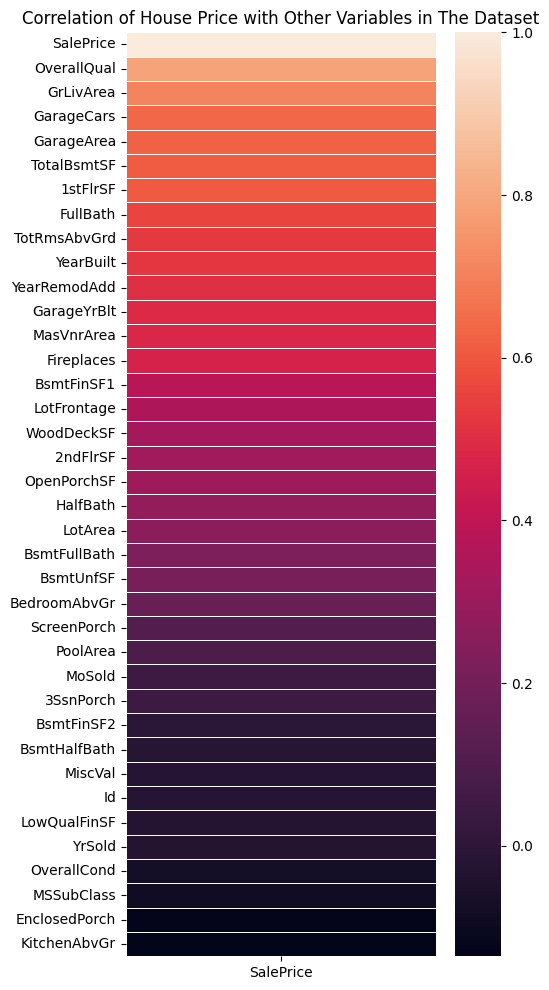

In [32]:
df2 = df.corr()[['SalePrice']].sort_values(by='SalePrice')[::-1]
f, ax = plt.subplots(figsize=(5, 12))
sns.heatmap(df2, linewidths=.5, ax=ax)
plt.title('Correlation of House Price with Other Variables in The Dataset')